In [46]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline
data= pd.read_csv("kc_house_data.csv")
data.head()
data.describe(include=[np.number])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [47]:
data.isnull().sum() 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

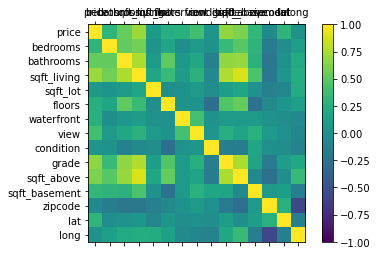

In [48]:
names=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','zipcode','lat','long']
df=data[names]
correlations= df.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,15,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [49]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

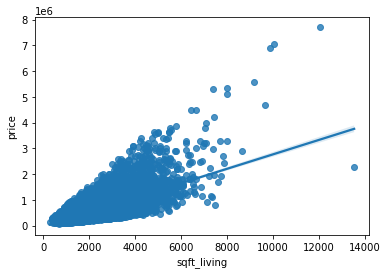

In [50]:
sns.regplot(x='sqft_living',y='price',data=data)

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

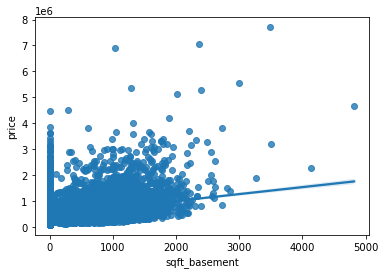

In [51]:
sns.regplot(x='sqft_basement',y='price',data=data)

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

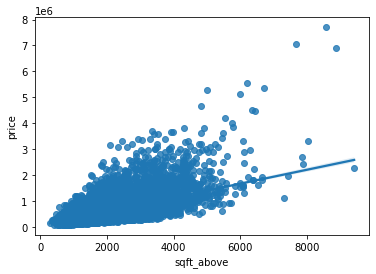

In [52]:
sns.regplot(x='sqft_above',y='price',data=data)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

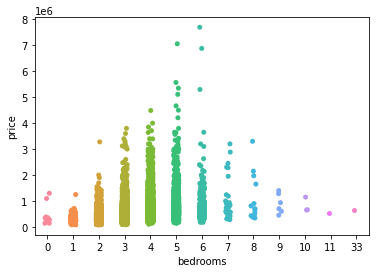

In [53]:
sns.stripplot(x='bedrooms', y='price',data=data)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

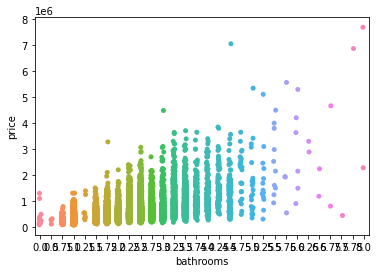

In [54]:
sns.stripplot(x='bathrooms', y='price',data=data, size=5)

<AxesSubplot:xlabel='grade', ylabel='price'>

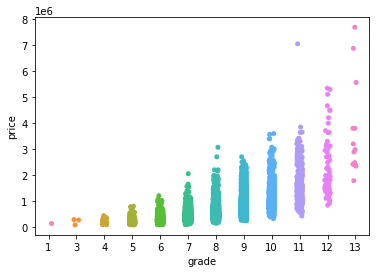

In [55]:
sns.stripplot(x='grade', y='price',data=data, size=5)

In [56]:
data=data[data['bedrooms'] < 10]

In [57]:
data=data[data['bathrooms']<8]

In [58]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [59]:
c=['bedrooms','bathrooms','sqft_living','sqft_above','grade']
df=data[c]

In [60]:
df=pd.get_dummies(df,columns=['grade'], drop_first=True)

In [61]:
y=data['price']

In [62]:
x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.8,random_state=42)
data.fillna(0)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [64]:
x_train.head()
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [65]:
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [-2.40123752e+04  1.18612408e+03  2.33256303e+02 -9.39663792e+01
  4.46669342e+04  5.62905144e+04  6.16023467e+04  8.28966221e+04
  1.14383769e+05  1.87484516e+05  3.32521890e+05  5.28281249e+05
  8.30136022e+05  1.33105258e+06  2.03634349e+06]


In [66]:
print(metrics.mean_squared_error(y_test, reg.predict(x_test)))

58127859345.848854


In [67]:
reg.score(x_test,y_test)

0.5945984881530678

In [68]:
df=pd.get_dummies(data,columns=['waterfront','view','condition','grade','zipcode'], drop_first=True)

In [69]:
y=data['price']
df= df.drop(['date','id','price'],axis=1)

In [70]:
x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.8,random_state=42)


In [71]:
reg.fit(x_train,y_train)

LinearRegression()

In [72]:
print('Coefficients: \n', reg.coef_)
print(metrics.mean_squared_error(y_test, reg.predict(x_test)))
print(reg.score(x_test,y_test))

Coefficients: 
 [-1.18093368e+04  2.71197230e+04  3.98575604e+12  2.91485970e-01
 -3.06058419e+04 -3.98575604e+12 -3.98575604e+12 -3.13111106e+02
  2.23102790e+01  2.10035127e+05 -1.81629752e+05  1.58061523e+01
 -1.54296875e-01  5.48446211e+05  9.31112311e+04  7.70647819e+04
  1.41845656e+05  3.16324076e+05  8.49874468e+04  8.86516760e+04
  1.14727727e+05  1.55265443e+05  2.93524873e+04 -4.76002781e+04
 -8.94469181e+04 -9.15843188e+04 -8.70648193e+04 -6.54458389e+04
  1.02064541e+04  1.26793872e+05  3.29641407e+05  7.22647856e+05
  1.37777088e+06  1.97264237e+04 -1.13142561e+04  7.22000673e+05
  2.68327724e+05  2.22871150e+05  2.17460604e+05  2.30369379e+05
  1.04525066e+05  5.43115914e+04  8.91067982e+04  6.86396022e+04
  6.35802558e+04 -4.22066747e+04  1.73146425e+05  1.66447270e+05
  4.64218582e+04  2.20877063e+05  1.40060359e+04  1.46355883e+04
 -1.10936313e+04  2.98388867e+05  1.28695602e+05  7.00526249e+04
  1.11474721e+06  4.65332715e+05  2.40448947e+04  1.58075479e+05
  1.95064